In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
data = datasets.load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris_df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Adicionar o target

In [8]:
iris_df["target"] = data["target"]

In [9]:
iris_df["target_species"] = iris_df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
# Descrição
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_species     150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [ ]:
# Distribuição dos dados

In [13]:
def hist(col):
    if col!="target" and col!="target_species":
        iris_df[col].hist(color='steelblue')
        plt.title(col)
        plt.grid(False)
        plt.show()

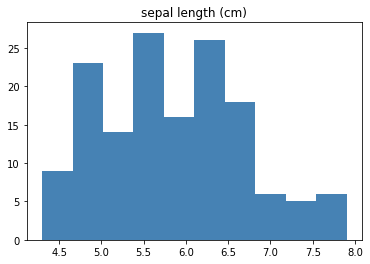

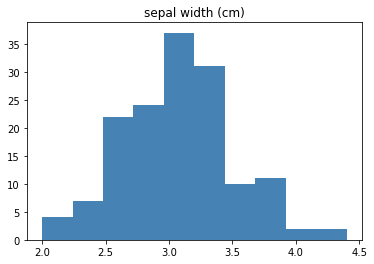

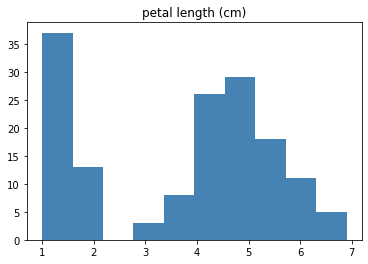

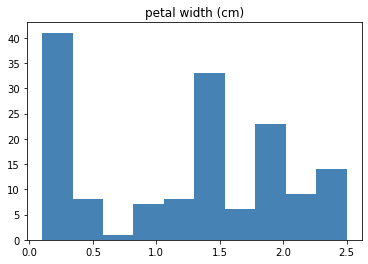

In [14]:
for col in iris_df.columns:
    hist(col)

In [ ]:
# Plot das features com o target

In [16]:
def plot_rel(col):
    if col!="target" and col!="target_species":
        sns.relplot(x=col, y="target", hue="target_species", data=iris_df)
        plt.title(col)
        plt.show()

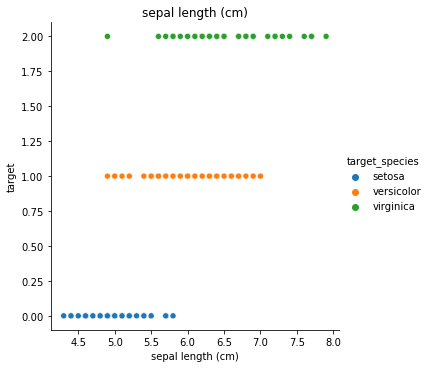

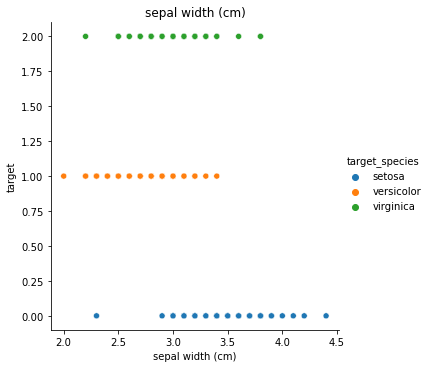

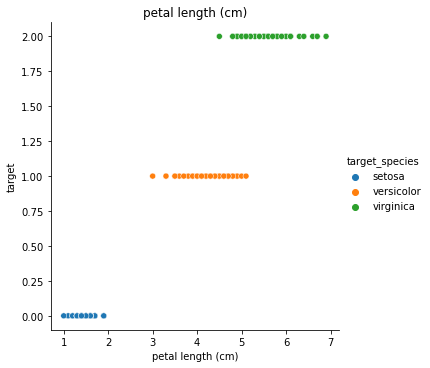

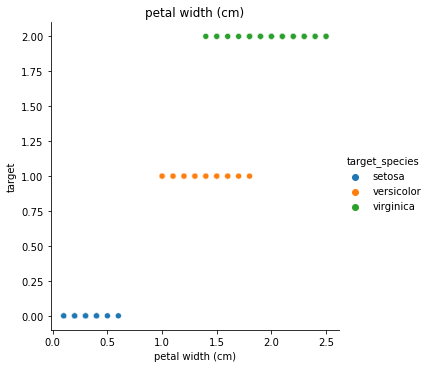

In [17]:
for col in iris_df.columns:
    plot_rel(col)

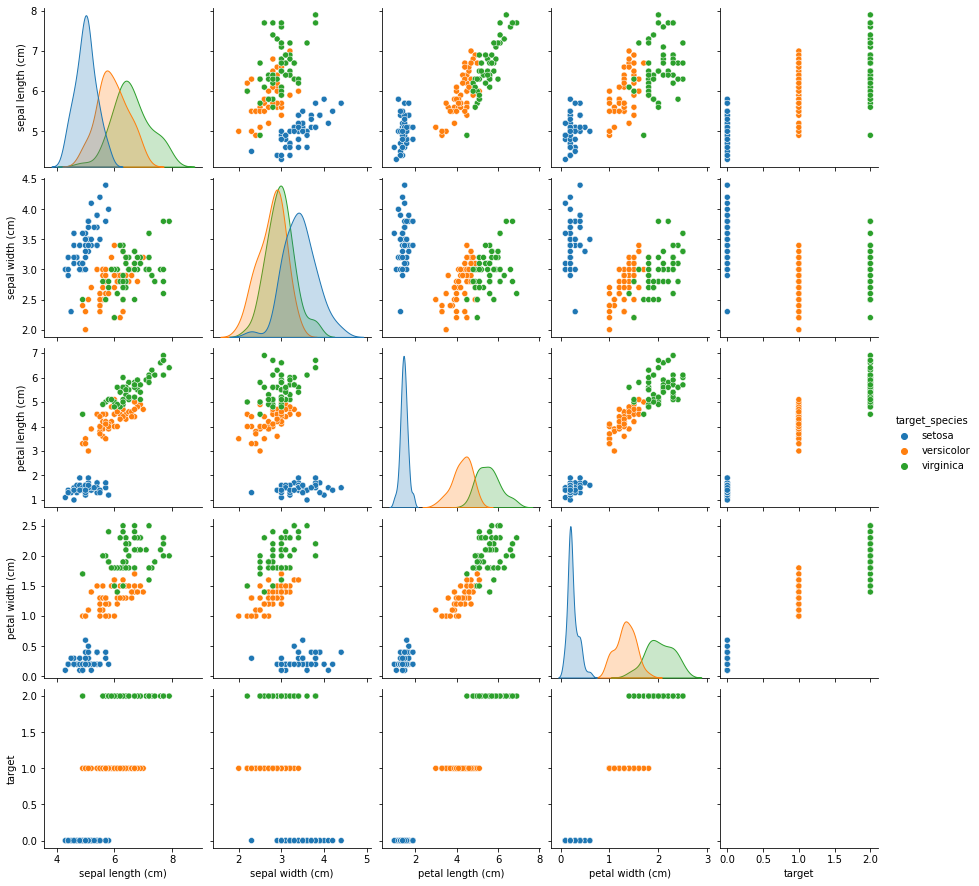

In [18]:
sns.pairplot(iris_df, hue="target_species")

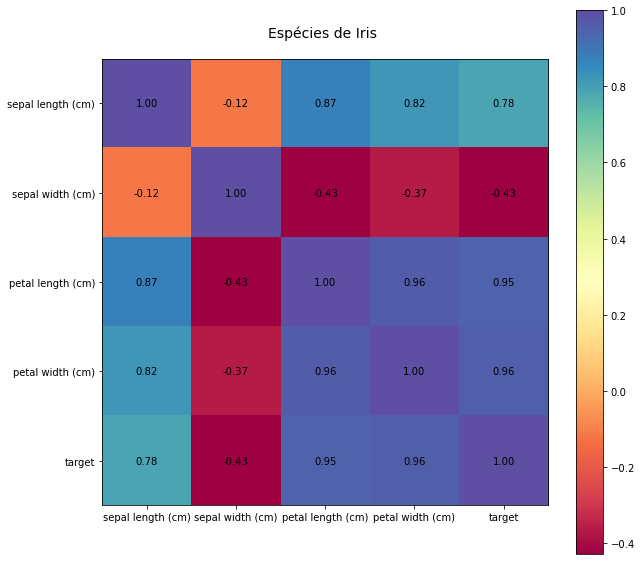

In [19]:
plt.imshow(iris_df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(iris_df.corr().columns)), iris_df.corr().columns)
plt.yticks(range(len(iris_df.corr().columns)), iris_df.corr().columns)
labels = iris_df.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black')
plt.title('Espécies de Iris \n', fontsize=14)
plt.show()

In [ ]:
# Train_test_split
train, test = train_test_split(iris_df, test_size=0.25, random_state=0)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.head()

In [ ]:
X_train = train.drop(columns=["target", "target_species"]).values
y_train = train["target"].values

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
# Criação do modelo
model = LogisticRegression()

In [ ]:
# Dataset de validação
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=0) 

In [ ]:
X_t.shape

In [ ]:
X_val.shape

In [ ]:
model.fit(X_t, y_t)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
model.score(X_val, y_val)

In [ ]:
# Cross validation
cross_model = LogisticRegression(max_iter=200)

In [ ]:
cross_val_score(cross_model, X_train, y_train, cv=5)

In [ ]:
cross_val_score?